In [21]:
#%% Imports
import os
import shutil
import nibabel as nib
from glob import glob
from nilearn.image import resample_to_img
from nilearn.masking import compute_background_mask
from nilearn.plotting import plot_roi

In [5]:
#%% Set current directory
#os.chdir('/home/uziel/DISS/ischleseg') # linux
os.chdir('C:\Users\Carlos Uziel\Documents\DISS\ischleseg') # windows

In [6]:
#%% List all sequences per subject
#root = '/home/uziel/DISS/data/Training' # linux
root = 'C:\Users\Carlos Uziel\Documents\DISS\data\Training' # windows

subjects_paths = sorted(os.listdir(root))
channels_per_subject = dict() # groups relevant sequences per subject
for i in range(len(subjects_paths)):
    s_path = os.path.join(root, subjects_paths[i])
    channels_per_subject[i] = [y for x in os.walk(s_path) for y in
                        glob(os.path.join(x[0], '*ADC*.nii')) or
                        glob(os.path.join(x[0], '*MTT*.nii')) or
                        glob(os.path.join(x[0], '*rCBF*.nii')) or
                        glob(os.path.join(x[0], '*rCBV*.nii')) or
                        glob(os.path.join(x[0], '*Tmax*.nii')) or
                        glob(os.path.join(x[0], '*TTP*.nii')) or
                        glob(os.path.join(x[0], '*OT*.nii'))]


In [15]:
#%% Resample images to same shape and voxel size
#root = '../data_processed/' # linux
root = '..\data_processed\\' # windows
# remove and create dir for processed data
if os.path.exists(root): shutil.rmtree(root)
os.mkdir(root)

# load template image
template = nib.load(channels_per_subject[0][0])

for subject in channels_per_subject.keys():
    # create subdirectory per subject
    subject_root = os.path.join(root, str(subject))
    os.mkdir(root + str(subject))

    for channel_file in channels_per_subject[subject]:
        img = nib.load(channel_file)
        # Resample img to match template
        resampled_img = resample_to_img(img,template)
        # Save resampled image
        file_name = os.path.basename(channel_file)
        nib.save(resampled_img, os.path.join(subject_root, file_name) + '.gz')


In [16]:
#%% Compute ROI mask (eg. brain mask) per subject
for subject in sorted(os.listdir(root)):
    # get all channels for subject
    subject_root = os.path.join(root, str(subject))
    # ignore label channel
    imgs = [x for x in glob(os.path.join(subject_root,'*')) if not "OT" in x]
    # compute subject brain mask given all channels
    mask = compute_background_mask(imgs)
    # save mask
    nib.save(mask, os.path.join(subject_root, 'mask.nii.gz'))
    

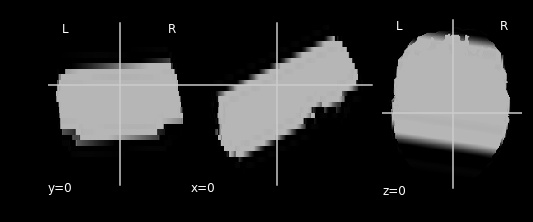

In [44]:
#img = compute_background_mask('..\\data_processed\\9\\VSD.Brain.XX.O.MR_ADC.128029.nii.gz')
img = compute_background_mask('..\\data\\Training\\training_19\\VSD.Brain.XX.O.MR_rCBF.127088\\VSD.Brain.XX.O.MR_rCBF.127088.nii')
mask = compute_background_mask(img)
plot_roi(None,img)

In [ ]:
#%% FULL - Resample images to same shape and voxel size
root = '../data_processed/'
# remove and create dir for processed data
if os.path.exists(root): shutil.rmtree(root)
os.mkdir(root)

# load template image
template = nib.load(channels_per_subject[0][0])

for subject in channels_per_subject.keys():
    # create subdirectory per subject
    subject_root = root + str(subject) + '/'
    os.mkdir(root + str(subject))
    subject_imgs = []
    for channel_file in channels_per_subject[subject]:
        img = nib.load(channel_file)
        # Resample img to match template
        resampled_img = resample_to_img(img,template)
        subject_imgs.append([resampled_img, channel_file])
        
    # compute subject brain mask given all channels
    mask = compute_background_mask([x for x,y in subject_imgs])
    # normalize each image and save
    for img, channel_file in subject_imgs:
        # normalize image within mask
        norm_img = img
        # save image
        file_name = channel_file.split('/')[-1]
        nib.save(norm_img, subject_root + file_name + '.gz' )
